In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multivariate_normal
from sklearn.neighbors import KNeighborsClassifier
from numpy.linalg import det
from numpy.linalg import inv
from sklearn.model_selection import StratifiedKFold
import pylab
import matplotlib._pylab_helpers
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp

In [53]:
N = 250
mean0,cov0 = [1, -0.5], np.array([[0.5, 0.5], [0.5, 1.5]])

In [54]:
rv0 = multivariate_normal(mean0, cov0)
data0 = np.random.multivariate_normal(mean0, cov0, N)
data0.mean(),np.var(data0)

(0.20153440488513089, 1.7042320556369919)

In [55]:
mean1,cov1 = [1,1],np.array([[1.5, -0.8], [-0.8, 0.5]])

In [56]:
rv1 = multivariate_normal(mean1, cov1)
data1 = np.random.multivariate_normal(mean1, cov1, N)
data1.mean(),np.var(data1)

(1.0263959804020446, 0.8492365319149608)

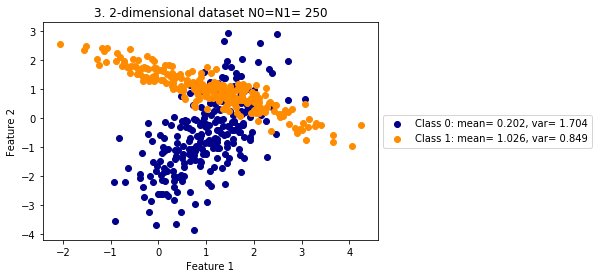

In [57]:
ax = plt.subplot()
plt.scatter(data0[:,0], data0[:,1],label='Class 0: mean= %.3f, var= %.3f' % (data0.mean(),np.var(data0)),c='darkblue')    
plt.scatter(data1[:,0], data1[:,1], label='Class 1: mean= %.3f, var= %.3f' % (data1.mean(),np.var(data1)),c='darkorange')
box = ax.get_position()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('3. 2-dimensional dataset N0=N1= %d' % N)
plt.show()

In [58]:
df_class0 = pd.DataFrame({'Feature 1':data0[:,0],'Feature 2':data0[:,1]})
class0 = [0 for i in range(0, len(df_class0))]
df_class0['true class'] = pd.Series(class0, index=df_class0.index)
demean_x0=df_class0['Feature 1']- np.mean(df_class0['Feature 1'])
df_class0['Feature 1_demean'] = pd.Series(demean_x0, index=df_class0.index)
demean_y0=df_class0['Feature 2']-np.mean(df_class0['Feature 2'])
df_class0['Feature 2_demean'] = pd.Series(demean_y0, index=df_class0.index)
mean_0 = np.array(df_class0.mean())
mean_0

array([ 9.87671076e-01, -5.84602266e-01,  0.00000000e+00,  7.14983628e-17,
       -2.17603713e-17])

In [59]:
mean0 = mean_0[:2]
mean0

array([ 0.98767108, -0.58460227])

In [60]:
X_0 = np.stack((df_class0['Feature 1'], df_class0['Feature 2']), axis=0)
cov0 = np.array(np.cov(X_0))
cov0

array([[0.527803  , 0.57516984],
       [0.57516984, 1.65336405]])

In [61]:
df_class0.head()

,Feature 1,Feature 2,true class,Feature 1_demean,Feature 2_demean
0,1.099636,0.117113,0,0.111965,0.701715
1,1.431391,1.977894,0,0.443720,2.562497
2,0.873357,-0.231181,0,-0.114315,0.353421
3,1.680788,0.738532,0,0.693117,1.323134
4,0.670107,-2.536738,0,-0.317564,-1.952136


In [62]:
df_class1 = pd.DataFrame({'Feature 1':data1[:,0],'Feature 2':data1[:,1]})
class1 = [1 for i in range(0, len(df_class1))]
df_class1['true class'] = pd.Series(class1, index=df_class1.index)
demean_x1=df_class1['Feature 1']-np.mean(df_class1['Feature 1'])
df_class1['Feature 1_demean'] = pd.Series(demean_x1, index=df_class1.index)
demean_y1=df_class1['Feature 2']-np.mean(df_class1['Feature 2'])
df_class1['Feature 2_demean'] = pd.Series(demean_y1, index=df_class1.index)
mean_1 = np.array(df_class1.mean())
mean_1

array([1.08793208e+00, 9.64859881e-01, 1.00000000e+00, 8.88178420e-19,
       5.32907052e-18])

In [63]:
mean1 = mean_1[:2]
mean1

array([1.08793208, 0.96485988])

In [64]:
X_1 = np.stack((df_class1['Feature 1'], df_class1['Feature 2']), axis=0)
cov1 = np.array(np.cov(X_1))
cov1

array([[ 1.26417763, -0.6701998 ],
       [-0.6701998 ,  0.43351282]])

In [65]:
df_class1.head()

,Feature 1,Feature 2,true class,Feature 1_demean,Feature 2_demean
0,0.099173,1.306006,1,-0.988759,0.341146
1,2.174448,0.252426,1,1.086516,-0.712434
2,-1.550739,2.370695,1,-2.638671,1.405835
3,2.049325,0.172484,1,0.961393,-0.792376
4,0.741904,1.007457,1,-0.346028,0.042597


In [66]:
df = pd.concat([df_class0,df_class1])
df.head(),df.shape

(   Feature 1  Feature 2  true class  Feature 1_demean  Feature 2_demean
 0   1.099636   0.117113           0          0.111965          0.701715
 1   1.431391   1.977894           0          0.443720          2.562497
 2   0.873357  -0.231181           0         -0.114315          0.353421
 3   1.680788   0.738532           0          0.693117          1.323134
 4   0.670107  -2.536738           0         -0.317564         -1.952136,
 (500, 5))

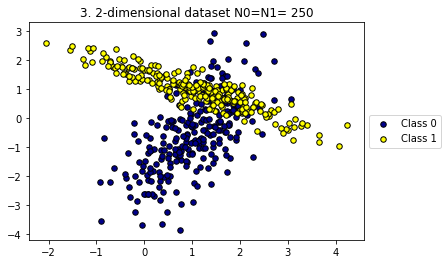

In [67]:
ax = plt.subplot()
plt.scatter(df[df['true class']==0]['Feature 1'], df[df['true class']==0]['Feature 2'], label='Class 0', c='darkblue',edgecolor='k', s=30)
box = ax.get_position()
plt.scatter(df[df['true class']==1]['Feature 1'], df[df['true class']==1]['Feature 2'], label='Class 1', c='yellow',edgecolor='k', s=30)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('3. 2-dimensional dataset N0=N1= %d' % N)
plt.show()

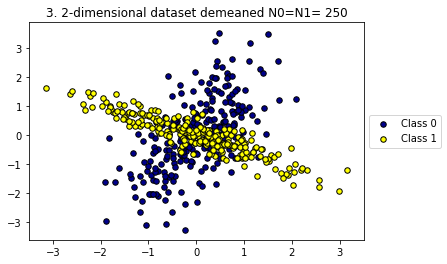

In [68]:
ax = plt.subplot()
plt.scatter(df[df['true class']==0]['Feature 1_demean'], df[df['true class']==0]['Feature 2_demean'], label='Class 0', c='darkblue',edgecolor='k', s=30)
box = ax.get_position()
plt.scatter(df[df['true class']==1]['Feature 1_demean'], df[df['true class']==1]['Feature 2_demean'], label='Class 1', c='yellow',edgecolor='k', s=30)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('3. 2-dimensional dataset demeaned N0=N1= %d' % N)
plt.show()

In [69]:
"""
X_trial = np.stack((df['Feature 1'], df['Feature 2']), axis=0)
cov_trial = np.array(np.cov(X_trial))
cov_trial
"""

"\nX_trial = np.stack((df['Feature 1'], df['Feature 2']), axis=0)\ncov_trial = np.array(np.cov(X_trial))\ncov_trial\n"

In [70]:
X_trial = np.stack((df['Feature 1_demean'], df['Feature 2_demean']), axis=0)
cov_trial = np.array(np.cov(X_trial))
cov_trial

array([[ 0.89419474, -0.04741976],
       [-0.04741976,  1.04134737]])

In [71]:
df.head()

,Feature 1,Feature 2,true class,Feature 1_demean,Feature 2_demean
0,1.099636,0.117113,0,0.111965,0.701715
1,1.431391,1.977894,0,0.443720,2.562497
2,0.873357,-0.231181,0,-0.114315,0.353421
3,1.680788,0.738532,0,0.693117,1.323134
4,0.670107,-2.536738,0,-0.317564,-1.952136


In [72]:
h = .02  # step size in the mesh 
X_train = df.loc[:,:'Feature 2']
# we create an instance of Neighbours Classifier and fit the data.
X1 = np.array(X_train)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X1[:, 0].min() - 0.1, X1[:, 0].max() + 0.1
y_min, y_max = X1[:, 1].min() - 0.1, X1[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
xx.shape

(350, 325)

In [73]:
def f(xx,yy,mean0,mean1,cov0,cov1,df,m,string,a):  
    mean1_a = mean1
    mean0_a = mean0
    points = np.c_[xx.ravel(),yy.ravel()]
    g0 = -0.5*np.sum(np.dot(points-mean0_a, inv(cov0))*(points-mean0_a),axis=1) - 0.5*np.log(det(cov0)) +np.log(0.5) - np.log(2*np.pi)
    g1 =  -0.5*np.sum(np.dot(points-mean1_a, inv(cov1))* (points-mean1_a),axis=1) - 0.5*np.log(det(cov1))+np.log(0.5) - np.log(2*np.pi)
    #prob = np.exp(np.sum(np.dot(points-mean1_a, inv(cov1)) * (points-mean1_a), axis=1))*0.5*(1/np.pi)/np.sqrt(det(cov1))
    Z = g1-g0
    """
    row = xx.shape[0]
    col = yy.shape[1]
    Z = np.ones((row,col))
    for i in range(row):
        for j in range(col):
            points = [xx[i][j],yy[i][j]]
            g0 = -0.5*np.sum(np.dot(points-mean0_a, inv(cov0))*(points-mean0_a)) - 0.5*np.log(det(cov0))
            g1 =  -0.5*np.sum(np.dot(points-mean1_a, inv(cov1))* (points-mean1_a)) - 0.5*np.log(det(cov1))
            Z[i][j] = g1-g0
    """
    Z = Z.reshape(xx.shape)
    #prob = prob.reshape(xx.shape)
    #plt.figure(figsize=(8,4))
    #clev = np.arange(Z.min(),Z.max(),.002)
    #cp = plt.contourf(xx,yy, Z,clev)
    cp=plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap='GnBu')
    plt.contour(xx, yy, Z,[m],colors=['red'])
    plt.colorbar(cp)
    plt.scatter(df[df['true class']==0]['Feature 1'], df[df['true class']==0]['Feature 2'], label='Class 0', c='darkblue',edgecolor='k', s=30)
    plt.scatter(df[df['true class']==1]['Feature 1'], df[df['true class']==1]['Feature 2'], label='Class 1', c='yellow',edgecolor='k', s=30)
    # Prettify the graph                                                                                              
    box = ax.get_position()
    plt.legend(loc=4)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("4({}).Bayes Classifier: {}".format(a,string))

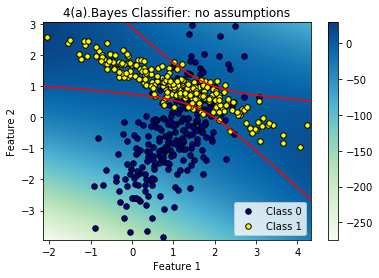

In [74]:
f(xx,yy,mean0,mean1,cov0,cov1,df,0,'no assumptions','a')

In [75]:
cov0_b = cov0[:][:]
cov0_b[0,1],cov0_b[1,0]= 0,0
cov1_b = cov1[:][:]
cov1_b[0,1],cov1_b[1,0]= 0,0
cov0_b,cov1_b

(array([[0.527803  , 0.        ],
        [0.        , 1.65336405]]), array([[1.26417763, 0.        ],
        [0.        , 0.43351282]]))

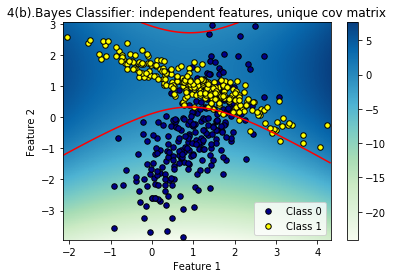

In [76]:
f(xx,yy,mean0,mean1,cov0_b,cov1_b,df,0,'independent features, unique cov matrix','b')

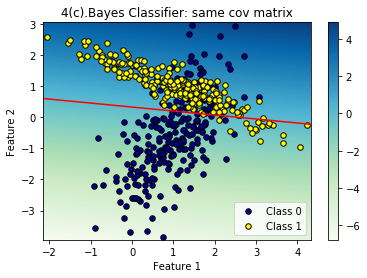

In [77]:
f(xx,yy,mean0,mean1,cov_trial,cov_trial,df,0,'same cov matrix','c')

In [78]:
cov_d = cov_trial[:][:]
cov_d[0,1]=0
cov_d[1,0]=0
cov_d

array([[0.89419474, 0.        ],
       [0.        , 1.04134737]])

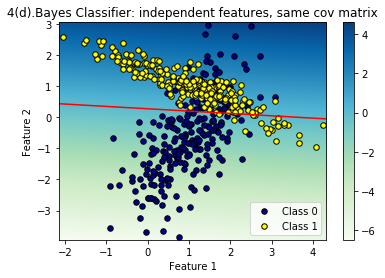

In [79]:
f(xx,yy,mean0,mean1,cov_d,cov_d,df,0,'independent features, same cov matrix','d')

In [80]:
 from sklearn.neighbors import NearestNeighbors

In [81]:
def DLRT(xx,yy,df,k,string,m):
    df['points'] = list(zip(df['Feature 1'], df['Feature 2']))  
    class_0 = df[df['true class']==0]['points'].tolist()
    class_1 = df[df['true class']==1]['points'].tolist()
    row = xx.shape[0]
    col = xx.shape[1]
    Z = np.ones((row,col))
    neigh_0= NearestNeighbors(n_neighbors=k)
    neigh_0.fit(class_0)
    neigh_1= NearestNeighbors(n_neighbors=k)
    neigh_1.fit(class_1)
    for i in range(row):
        for j in range(col):
            point = [xx[i][j],yy[i][j]]
            dist_0 = neigh_0.kneighbors([point])[0][0][-1]
            dist_1 = neigh_1.kneighbors([point])[0][0][-1]
            Z[i][j] = 2*(np.log(dist_0)-np.log(dist_1))
    #plt.figure(figsize=(8,4))
    clev = np.arange(Z.min(),Z.max(),.002)
    cp = plt.contourf(xx,yy, Z,clev,cmap ='GnBu')
    plt.contour(xx, yy, Z,[m],colors=['red'])
    #plt.clabel(c,inline=True,fontsize=10)
    plt.colorbar(cp)
    plt.scatter(df[df['true class']==1]['Feature 1'], df[df['true class']==1]['Feature 2'], label='Class 1', c='yellow',edgecolor='k', s=30)
    plt.scatter(df[df['true class']==0]['Feature 1'], df[df['true class']==0]['Feature 2'], label='Class 0', c='darkblue',edgecolor='k', s=30)
    # Prettify the graph
    box = ax.get_position()
    plt.legend(loc=4)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('{}.DLRT with k = {}'.format(string,k))

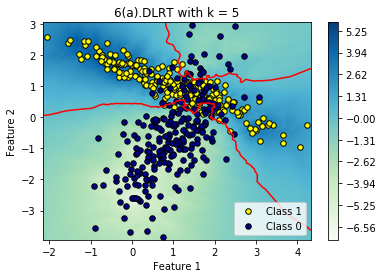

In [82]:
DLRT(xx,yy,df,5,'6(a)',0)

In [83]:
name_horse = ['true class','Feature 1','Feature 2']
df_horse = pd.read_csv('./dataSetHorseshoes.csv',header = None, names = name_horse)
df_horse.head()

,true class,Feature 1,Feature 2
0,1,0.807,0.610
1,0,0.056,0.503
2,0,0.215,-1.086
3,1,0.189,0.890
4,0,0.688,-1.209


In [84]:
h = .02  # step size in the mesh 
X= df_horse.loc[:,'Feature 1':]
# we create an instance of Neighbours Classifier and fit the data.
X= np.array(X)
y = np.array(df_horse['true class'])
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min_h, x_max_h = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min_h, y_max_h = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx_h, yy_h = np.meshgrid(np.arange(x_min_h, x_max_h, h),
                     np.arange(y_min_h, y_max_h, h))
xx_h.shape

(162, 166)

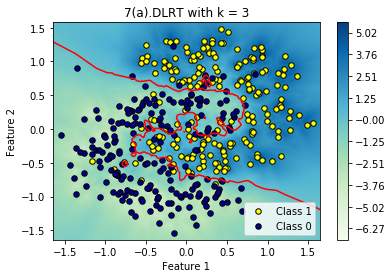

In [85]:
DLRT(xx_h,yy_h,df_horse,3,'7(a)',0)

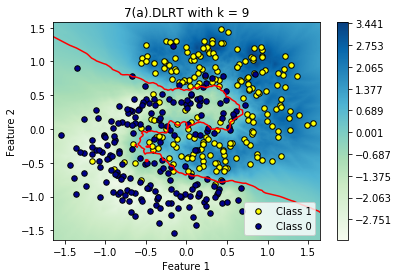

In [94]:
DLRT(xx_h,yy_h,df_horse,9,'7(a)',0)

In [87]:
def KNN_7b(df,X,k,m):
    h=0.02
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    # we create an instance of Neighbours Classifier and fit the data.
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    # Put the result into a color plot
    #plt.figure(figsize=(8,4))
    clev = np.arange(Z.min(),Z.max(),.002)
    cp = plt.contourf(xx,yy, Z,cmap='GnBu',alpha=.8)
    #cp = plt.contourf(xx,yy,Z1,399,cmap='cool',vmax =1,vmin=0)
    plt.contour(xx, yy, Z,[m],colors=['red'])
    plt.colorbar(cp)
    plt.scatter(df[df['true class']==1]['Feature 1'], df[df['true class']==1]['Feature 2'], label='Class 1', c='yellow',edgecolor='k', s=30)
    plt.scatter(df[df['true class']==0]['Feature 1'], df[df['true class']==0]['Feature 2'], label='Class 0', c='darkblue',edgecolor='k', s=30)
    # Prettify the graph
    plt.legend(loc=4)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("7(b).KNN = {}".format(k))

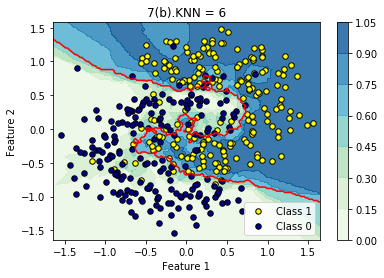

In [88]:
KNN_7b(df_horse,X,6,3/6)

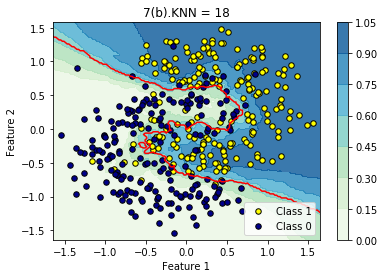

In [89]:
KNN_7b(df_horse,X,18,9/18)

In [90]:
def KNN_plot(X,y,n_splits):
    skf = StratifiedKFold(n_splits = 2, shuffle=False, random_state=0)
    skf.get_n_splits(X,y)
    tprs = []
    aucs = []
    color = ['purple','yellow']
    mean_fpr = np.linspace(0,1,100)
    i = 0
    mylist = list()
    for train,test in skf.split(X,y):
        X_train,X_test = X[train],X[test]
        y_train,y_test = y[train],y[test]
        #print("TRAIN:", train, "TEST:", test)
        mylist.append(train)
        mylist.append(test)
        knn = KNeighborsClassifier(n_neighbors=6)
        knn.fit(X_train,y_train)
        y_pred = knn.predict_proba(X_test)
        #print(y_pred[:,1])
        fpr,tpr,threshold = roc_curve(y_test,y_pred[:,1])
        tprs.append(interp(mean_fpr,fpr,tpr))
        tprs[-1][0]=0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr,tpr,lw=2,alpha=0.3)
        i +=1
        #ax1.plot(fpr,tpr,lw=2,alpha=0.3,label='ROC fold %d (AUC = %.2F)' % (i, roc_auc))
        #contour(X,y,X_train,y_train,X_test,y_test,knn,i)  
    plt.plot([0,1],[0,1],'r--',lw=2,alpha=0.8)
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('7(d).10_Fold cross_validated ROC: KNN(k =6)')
    box = ax.get_position()
    plt.legend(loc=4)
    plt.show()

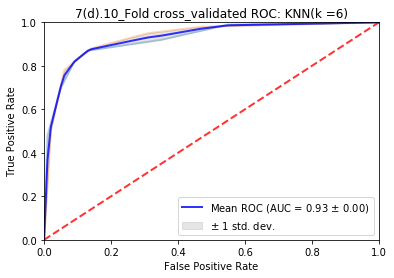

In [91]:
KNN_plot(X,y,10)

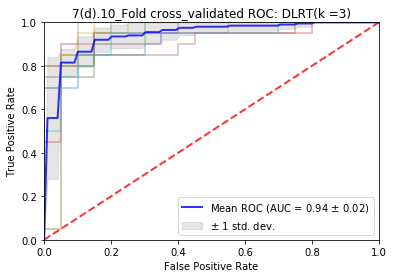

In [92]:
skf = StratifiedKFold(n_splits = 10, shuffle=False, random_state=0)
skf.get_n_splits(X,y)
tprs = []
aucs = []
color = ['purple','yellow']
mean_fpr = np.linspace(0,1,100)
i = 0
mylist = list()
for train,test in skf.split(X,y):
    X_train,X_test = X[train],X[test]
    y_train,y_test = y[train],y[test]
    #print("TRAIN:", train, "TEST:", test)
    mylist.append(train)
    mylist.append(test)
    df = pd.DataFrame({'Feature 1':X_train[:,0], 'Feature 2': X_train[:,1],'true class':y_train})
    df['points'] = list(zip(df['Feature 1'], df['Feature 2']))  
    class_0 = df[df['true class']==0]['points'].tolist()
    class_1 = df[df['true class']==1]['points'].tolist()
    df_test = pd.DataFrame({'Feature 1':X_test[:,0], 'Feature 2': X_test[:,1],'true class':y_test})
    df_test['points'] = list(zip(df_test['Feature 1'], df_test['Feature 2']))  
    y_pred = []
    row = df_test.shape[0]
    col = df_test.shape[1]
    neigh_0= NearestNeighbors(n_neighbors=3)
    neigh_0.fit(class_0)
    neigh_1= NearestNeighbors(n_neighbors=3)
    neigh_1.fit(class_1)
    for i in range(row):
            point = df_test['points'].iloc[i]
            #print(point)
            dist_0 = neigh_0.kneighbors([point])[0][0][-1]
            dist_1 = neigh_1.kneighbors([point])[0][0][-1]
            pred = np.exp(2*(np.log(dist_0)-np.log(dist_1)))
            """
            if pred>0:
                pred = 1
            else:
                pred = 0
                """
            y_pred.append(pred )
    fpr,tpr,threshold = roc_curve(y_test,y_pred)
    tprs.append(interp(mean_fpr,fpr,tpr))
    tprs[-1][0]=0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr,tpr,lw=2,alpha=0.3)
    i +=1
    #ax1.plot(fpr,tpr,lw=2,alpha=0.3,label='ROC fold %d (AUC = %.2F)' % (i, roc_auc))
    #contour(X,y,X_train,y_train,X_test,y_test,knn,i)  
plt.plot([0,1],[0,1],'r--',lw=2,alpha=0.8)
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('7(d).10_Fold cross_validated ROC: DLRT(k =3)')
box = ax.get_position()
plt.legend(loc=4)
plt.show()